<a href="https://colab.research.google.com/github/kOanhNe/-8puzzel-solver/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lưu ý

# Mình sẽ đánh giá essemble của train bằng silhoutte Và đánh giá external giữa independent với actual. Internal chỉ dùng để đánh giá train thôi

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

TARGET_FOLDER = "Project Machine Learning"
BASE_PATH = None

for root, dirs, files in os.walk("/content/drive/MyDrive"):
    if TARGET_FOLDER in dirs:
        BASE_PATH = os.path.join(root, TARGET_FOLDER)
        break

if BASE_PATH is None:
    raise FileNotFoundError(" Không tìm thấy thư mục Project Machine Learning")

print(" Dùng thư mục:", BASE_PATH)
print(" File trong thư mục:", os.listdir(BASE_PATH))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Dùng thư mục: /content/drive/MyDrive/Project Machine Learning
 File trong thư mục: ['actual.csv', 'data_set_ALL_AML_train.csv', 'data_set_ALL_AML_independent.csv', 'train_scaled.csv', 'test_scaled.csv']


# Setup môi trường

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
from sklearn.decomposition import PCA
import joblib
warnings.filterwarnings('ignore')

# Tải dữ liệu

In [3]:
# Train & Independent: gene là index
df_train = pd.read_csv(
    os.path.join(BASE_PATH, "data_set_ALL_AML_train.csv"),
    index_col=0
)

df_test = pd.read_csv(
    os.path.join(BASE_PATH, "data_set_ALL_AML_independent.csv"),
    index_col=0
)

# actual.csv: chỉ chứa nhãn → KHÔNG dùng index_col
df_actual = pd.read_csv(
    os.path.join(BASE_PATH, "actual.csv")
)

print("Train shape:", df_train.shape)
print("Independent shape:", df_test.shape)
print("Actual shape:", df_actual.shape)


Train shape: (7129, 77)
Independent shape: (7129, 69)
Actual shape: (72, 2)


# Tiền Xử Lý Dữ Liệu (Clean + Transpose + Z-score + PCA)

In [4]:
# === CLEAN ===
def clean_gene_expression(df):
    drop_cols = [
        col for col in df.columns
        if "Gene Description" in col
        or "Gene Accession Number" in col
        or "call" in col.lower()
    ]
    df_clean = df.drop(columns=drop_cols, errors='ignore')
    return df_clean

# Clean
df_train_clean = clean_gene_expression(df_train)
df_test_clean  = clean_gene_expression(df_test)

# === TRANSPOSE ===
X_train = df_train_clean.T
X_test  = df_test_clean.T

print("Train shape after transpose:", X_train.shape)
print("Test shape after transpose:", X_test.shape)

# === Z-SCORE NORMALIZATION ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

# === PCA ===
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Train PCA shape:", X_train_pca.shape)
print("Test PCA shape:", X_test_pca.shape)
print("Number of PCs kept:", pca.n_components_)

# === PCA → DataFrame ===
pc_cols = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]

X_train_pca_df = pd.DataFrame(
    X_train_pca,
    index=X_train.index,
    columns=pc_cols
)

X_test_pca_df = pd.DataFrame(
    X_test_pca,
    index=X_test.index,
    columns=pc_cols
)

# === SAVE FILE (CHỈ SỬA ĐƯỜNG DẪN) ===
X_train_out = X_train_pca_df.copy()
X_train_out.insert(0, "Sample_ID", X_train_out.index)
X_train_out.to_csv(
    os.path.join(BASE_PATH, "train_scaled.csv"),
    index=False
)

X_test_out = X_test_pca_df.copy()
X_test_out.insert(0, "Sample_ID", X_test_out.index)
X_test_out.to_csv(
    os.path.join(BASE_PATH, "test_scaled.csv"),
    index=False
)


Train shape after transpose: (38, 7129)
Test shape after transpose: (34, 7129)
Scaled train shape: (38, 7129)
Scaled test shape: (34, 7129)
Train PCA shape: (38, 32)
Test PCA shape: (34, 32)
Number of PCs kept: 32


# BASE MODELS - K-MEANS++

# BASE MODELS - HIERARCHICAL

# **Xây dựng mô hình (Training) và đánh giá nội bộ (chưa đụng đến tập Test hay so sánh với thực tế)**

 Đã tải dữ liệu Train: (38, 32)

 BẮT ĐẦU HUẤN LUYỆN (Linkage: SINGLE)
   Iter 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
 Hoàn tất! Tìm thấy 2 cụm.
   => SINGLE: Silhouette=0.2811, DB_Index=0.5682


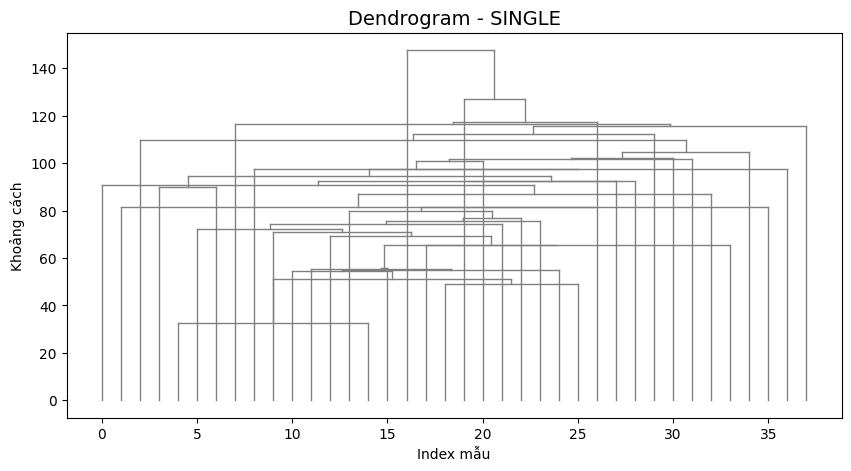


 BẮT ĐẦU HUẤN LUYỆN (Linkage: AVERAGE)
   Iter 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
 Hoàn tất! Tìm thấy 2 cụm.
   => AVERAGE: Silhouette=0.2811, DB_Index=0.5682


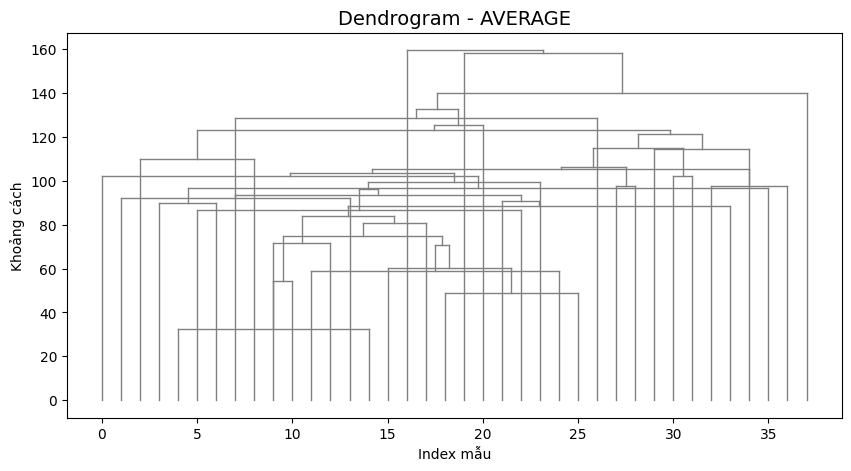


 BẮT ĐẦU HUẤN LUYỆN (Linkage: COMPLETE)
   Iter 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
 Hoàn tất! Tìm thấy 2 cụm.
   => COMPLETE: Silhouette=0.2846, DB_Index=1.4111


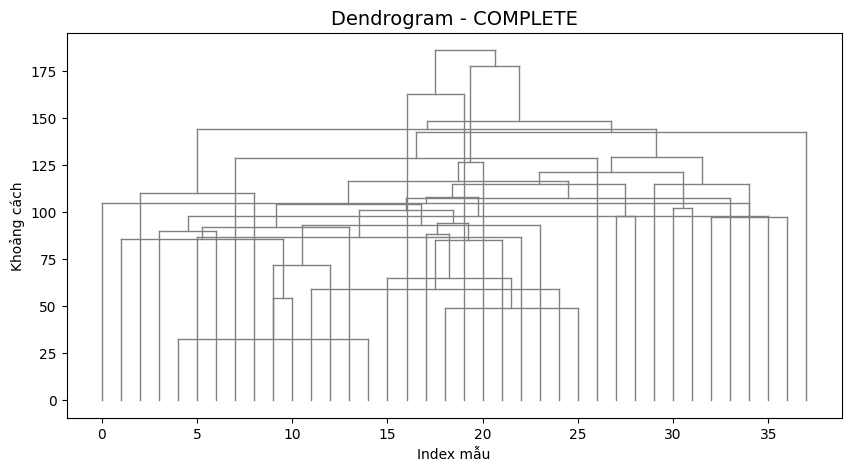


 BẮT ĐẦU HUẤN LUYỆN (Linkage: WARD)
   Iter 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
 Hoàn tất! Tìm thấy 2 cụm.
   => WARD: Silhouette=0.0977, DB_Index=2.6957


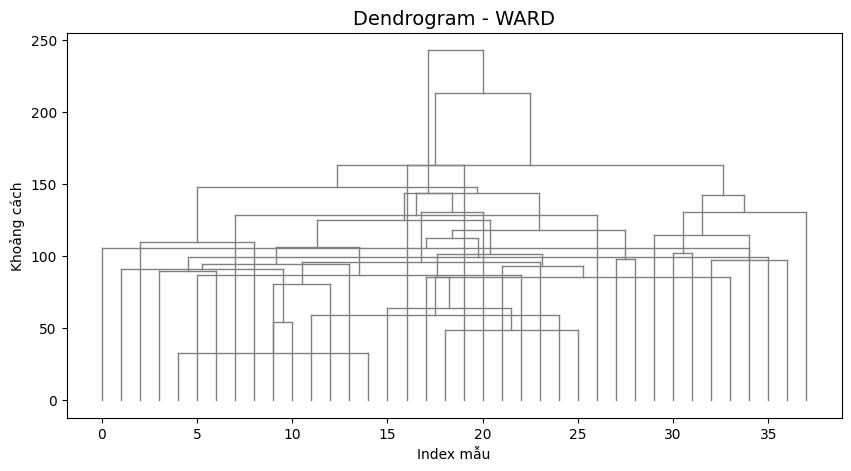


 BẢNG KẾT QUẢ ĐÁNH GIÁ NỘI BỘ
          Silhouette  DB_Index
single      0.281052  0.568246
average     0.281052  0.568246
complete    0.284613  1.411134
ward        0.097708  2.695706


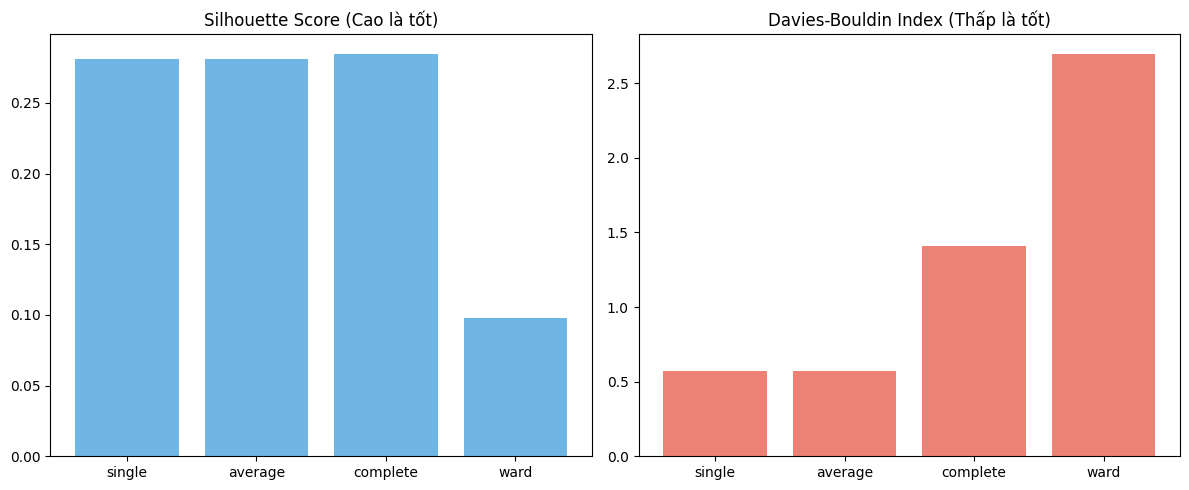


 KHUYẾN NGHỊ: Dựa trên cấu trúc dữ liệu Train (Silhouette),
   phương pháp 'COMPLETE' cho kết quả phân cụm tốt nhất.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
import os

# ============================================================
# PHẦN 1: CLASS HIERARCHICAL CLUSTERING
# ============================================================

class HierarchicalClustering:
    """
    Agglomerative Hierarchical Clustering - Tự code từ đầu.
    Hỗ trợ: Single, Complete, Average, Ward.
    """

    def __init__(self, n_clusters=2, linkage='ward'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.labels_ = None
        self.centroids_ = None
        self.merge_history_ = []
        self.cluster_coords_ = {}

    def _euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def _compute_distance_matrix(self, X):
        n = X.shape[0]
        dist_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(i+1, n):
                dist = self._euclidean_distance(X[i], X[j])
                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist
        return dist_matrix

    # --- CÁC HÀM TÍNH KHOẢNG CÁCH (LINKAGE) ---
    def _single_linkage_distance(self, c1_idxs, c2_idxs, dist_matrix):
        min_dist = float('inf')
        for i in c1_idxs:
            for j in c2_idxs:
                if dist_matrix[i, j] < min_dist: min_dist = dist_matrix[i, j]
        return min_dist

    def _complete_linkage_distance(self, c1_idxs, c2_idxs, dist_matrix):
        max_dist = 0
        for i in c1_idxs:
            for j in c2_idxs:
                if dist_matrix[i, j] > max_dist: max_dist = dist_matrix[i, j]
        return max_dist

    def _average_linkage_distance(self, c1_idxs, c2_idxs, dist_matrix):
        total_dist = 0
        count = 0
        for i in c1_idxs:
            for j in c2_idxs:
                total_dist += dist_matrix[i, j]
                count += 1
        return total_dist / count if count > 0 else 0

    def _ward_linkage_distance(self, c1_idxs, c2_idxs, X):
        points1 = X[c1_idxs]
        points2 = X[c2_idxs]
        mean1 = np.mean(points1, axis=0)
        mean2 = np.mean(points2, axis=0)
        n1, n2 = len(c1_idxs), len(c2_idxs)
        dist = np.sqrt((2 * n1 * n2) / (n1 + n2)) * self._euclidean_distance(mean1, mean2)
        return dist

    def _cluster_distance(self, c1_idxs, c2_idxs, dist_matrix, X):
        if self.linkage == 'single': return self._single_linkage_distance(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'complete': return self._complete_linkage_distance(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'average': return self._average_linkage_distance(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'ward': return self._ward_linkage_distance(c1_idxs, c2_idxs, X)
        else: raise ValueError(f"Linkage '{self.linkage}' không hợp lệ!")

    def fit(self, X):
        print(f"\n BẮT ĐẦU HUẤN LUYỆN (Linkage: {self.linkage.upper()})")
        n_samples = X.shape[0]
        self.merge_history_ = []
        clusters = {i: [i] for i in range(n_samples)}

        dist_matrix = None
        if self.linkage != 'ward':
            dist_matrix = self._compute_distance_matrix(X)

        self.cluster_coords_ = {i: (float(i), 0.0) for i in range(n_samples)}

        iteration = 0
        current_cluster_id = n_samples

        while len(clusters) > 1:
            iteration += 1
            min_dist = float('inf')
            merge_pair = None
            cluster_ids = list(clusters.keys())

            for i in range(len(cluster_ids)):
                for j in range(i+1, len(cluster_ids)):
                    id1, id2 = cluster_ids[i], cluster_ids[j]
                    dist = self._cluster_distance(clusters[id1], clusters[id2], dist_matrix, X)
                    if dist < min_dist:
                        min_dist = dist
                        merge_pair = (id1, id2)

            c1, c2 = merge_pair
            x1, y1 = self.cluster_coords_[c1]
            x2, y2 = self.cluster_coords_[c2]
            self.cluster_coords_[current_cluster_id] = ((x1+x2)/2.0, min_dist)

            clusters[current_cluster_id] = clusters[c1] + clusters[c2]
            del clusters[c1]; del clusters[c2]
            self.merge_history_.append((c1, c2, current_cluster_id, min_dist))

            if len(clusters) == self.n_clusters:
                print(f"   -> Đã đạt mốc {self.n_clusters} cụm. Lưu trạng thái model...")
                self.labels_ = np.zeros(n_samples, dtype=int)
                self.centroids_ = []
                for idx, (cid, members) in enumerate(clusters.items()):
                    self.labels_[members] = idx
                    self.centroids_.append(np.mean(X[members], axis=0))
                self.centroids_ = np.array(self.centroids_)

            current_cluster_id += 1
            if iteration % 20 == 0: print(f"   Iter {iteration}: Còn {len(clusters)} cụm...")

        print(f" Hoàn tất! Tìm thấy {len(self.centroids_) if self.centroids_ is not None else 0} cụm.")
        return self

    def plot_dendrogram(self):
        plt.figure(figsize=(10, 5))
        for c1, c2, new_id, dist in self.merge_history_:
            x1, y1 = self.cluster_coords_[c1]
            x2, y2 = self.cluster_coords_[c2]
            plt.plot([x1, x1], [y1, dist], c='gray', lw=1)
            plt.plot([x2, x2], [y2, dist], c='gray', lw=1)
            plt.plot([x1, x2], [dist, dist], c='gray', lw=1)
        plt.title(f"Dendrogram - {self.linkage.upper()}", fontsize=14)
        plt.xlabel("Index mẫu"); plt.ylabel("Khoảng cách")
        plt.show()

# ============================================================
# PHẦN 2: CHỈ TRAIN VÀ ĐÁNH GIÁ NỘI BỘ
# ============================================================

if __name__ == "__main__":
    # 1. CHỈ LOAD DỮ LIỆU TRAIN
    try:
        train_df = pd.read_csv(os.path.join(BASE_PATH, 'train_scaled.csv'))
        X_train = train_df.drop('Sample_ID', axis=1, errors='ignore').values
        print(f" Đã tải dữ liệu Train: {X_train.shape}")
    except Exception as e:
        print(f"Lỗi tải file: {e}"); exit()

    # 2. CHẠY THỬ CÁC PHƯƠNG PHÁP TRÊN TẬP TRAIN
    linkages = ['single', 'average', 'complete', 'ward']
    results = {}

    for link in linkages:
        # A. Chỉ Fit (Không Predict)
        model = HierarchicalClustering(n_clusters=2, linkage=link)
        model.fit(X_train)

        if model.centroids_ is not None:
            # B. Đánh giá Nội bộ (Silhouette & DB Index)
            # Đây là thước đo duy nhất khi chưa có Test/Actual
            sil = silhouette_score(X_train, model.labels_)
            db = davies_bouldin_score(X_train, model.labels_)

            results[link] = {'Silhouette': sil, 'DB_Index': db}
            print(f"   => {link.upper()}: Silhouette={sil:.4f}, DB_Index={db:.4f}")

            # C. Vẽ Dendrogram (Quan trọng để xem cấu trúc cây)
            model.plot_dendrogram()
        else:
            print(f"   => {link.upper()}: Lỗi.")

    # 3. BẢNG TỔNG HỢP
    print("\n BẢNG KẾT QUẢ ĐÁNH GIÁ NỘI BỘ")
    res_df = pd.DataFrame(results).T
    print(res_df)

    # 4. TRỰC QUAN HÓA SO SÁNH (Chỉ còn 2 chỉ số)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Biểu đồ Silhouette
    axes[0].bar(res_df.index, res_df['Silhouette'], color='#3498db', alpha=0.7)
    axes[0].set_title('Silhouette Score (Cao là tốt)')

    # Biểu đồ DB Index
    axes[1].bar(res_df.index, res_df['DB_Index'], color='#e74c3c', alpha=0.7)
    axes[1].set_title('Davies-Bouldin Index (Thấp là tốt)')

    plt.tight_layout()
    plt.show()

    # 5. KHUYẾN NGHỊ
    # Chọn phương pháp có Silhouette cao nhất
    best_link = res_df['Silhouette'].idxmax()
    print(f"\n KHUYẾN NGHỊ: Dựa trên cấu trúc dữ liệu Train (Silhouette),")
    print(f"   phương pháp '{best_link.upper()}' cho kết quả phân cụm tốt nhất.")

# **Dưới là code hoàn chỉnh xây mô hình + test + đánh giá + so sánh => Đưa ra lời khuyên**

---



 Đã tải dữ liệu thành công.
 Dữ liệu Train: (38, 32)
 Dữ liệu Test: (34, 32) (Đã có nhãn thực tế để kiểm tra NMI)

 BẮT ĐẦU HUẤN LUYỆN (Linkage: SINGLE)
   Iteration 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
 Hoàn tất! Tìm thấy 2 cụm.
   => Kết quả SINGLE: Silhouette=0.281, NMI=0.000


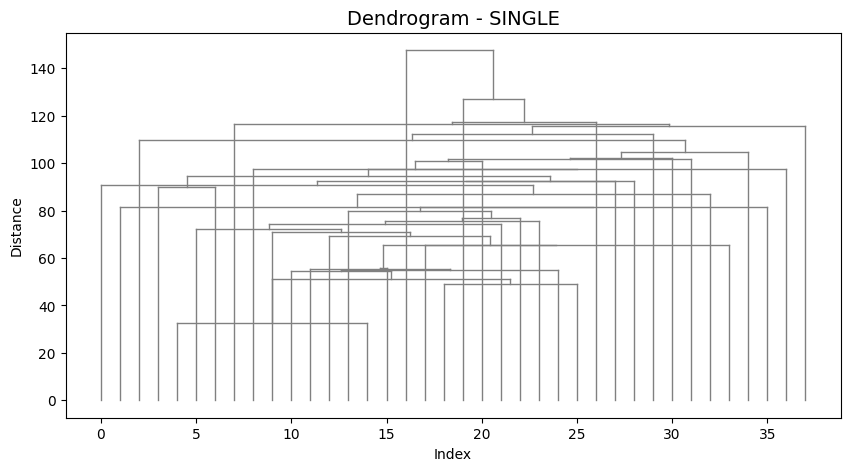


 BẮT ĐẦU HUẤN LUYỆN (Linkage: AVERAGE)
   Iteration 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
 Hoàn tất! Tìm thấy 2 cụm.
   => Kết quả AVERAGE: Silhouette=0.281, NMI=0.000


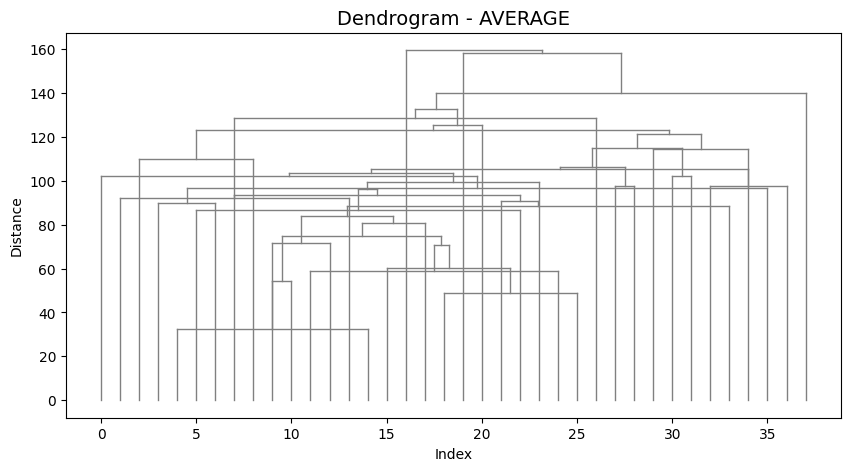


 BẮT ĐẦU HUẤN LUYỆN (Linkage: COMPLETE)
   Iteration 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
 Hoàn tất! Tìm thấy 2 cụm.
   => Kết quả COMPLETE: Silhouette=0.285, NMI=0.000


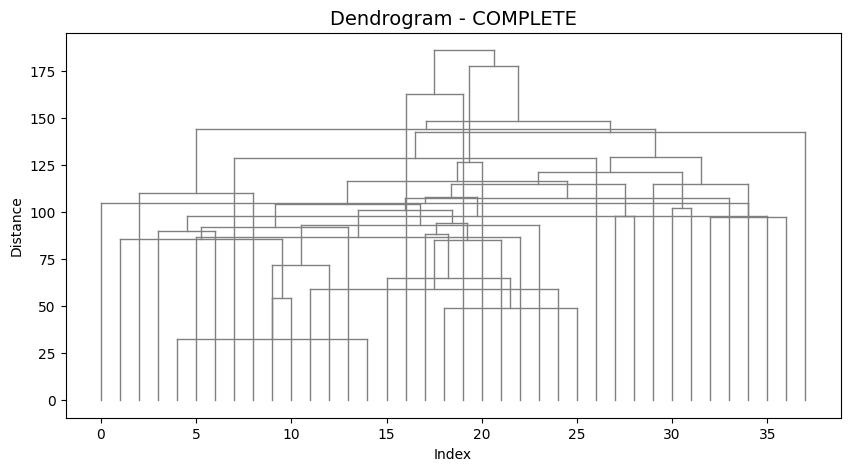


 BẮT ĐẦU HUẤN LUYỆN (Linkage: WARD)
   Iteration 20: Còn 18 cụm...
   -> Đã đạt mốc 2 cụm. Lưu trạng thái model...
 Hoàn tất! Tìm thấy 2 cụm.
   => Kết quả WARD: Silhouette=0.098, NMI=0.208


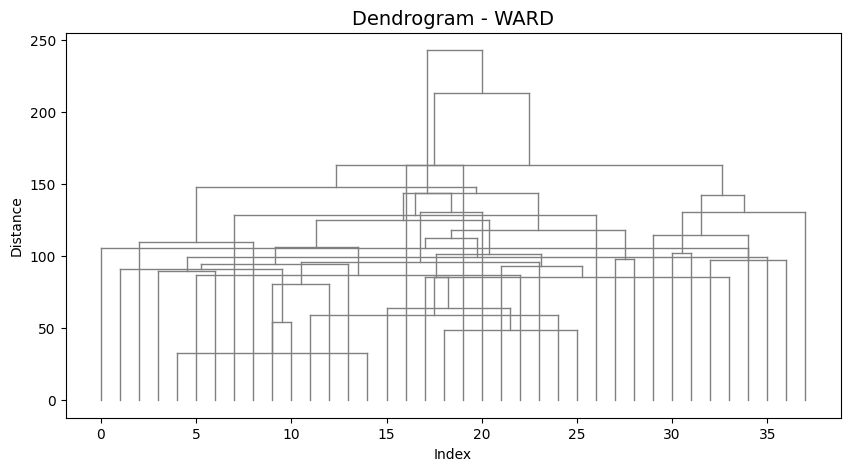

 BẢNG TỔNG HỢP KẾT QUẢ
          Silhouette  DB_Index       NMI
single      0.281052  0.568246  0.000000
average     0.281052  0.568246  0.000000
complete    0.284613  1.411134  0.000000
ward        0.097708  2.695706  0.207863


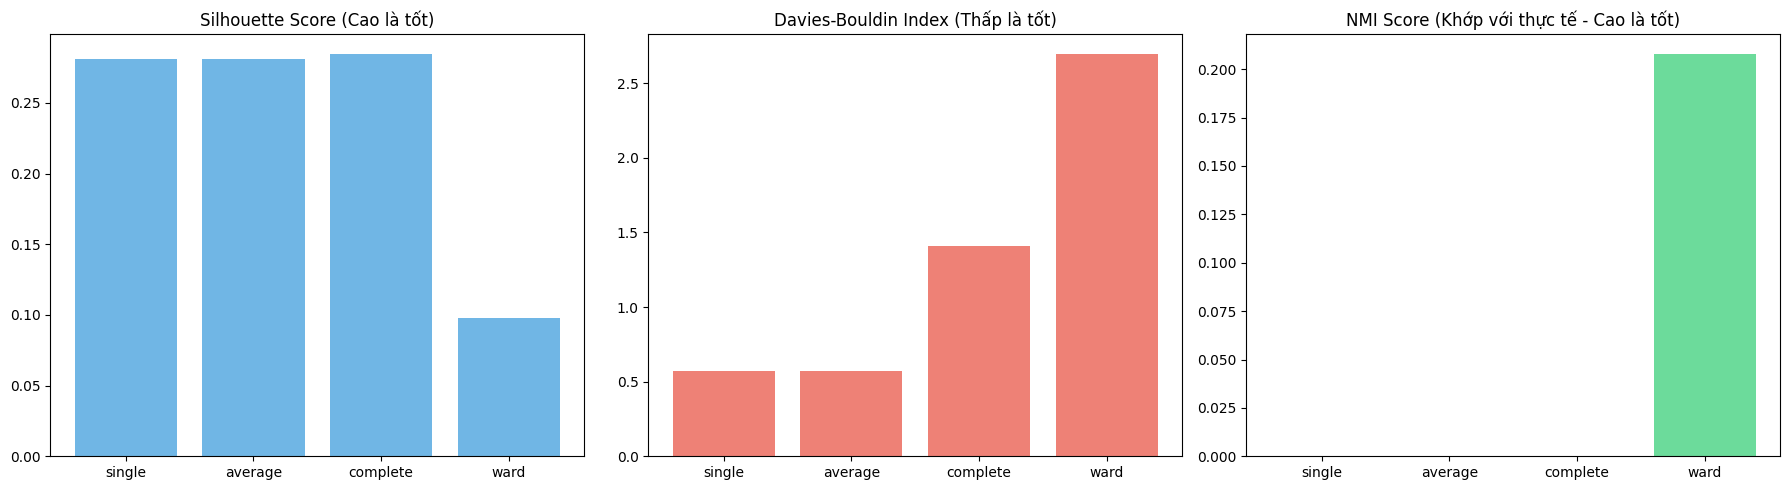


 KHUYẾN NGHỊ: Dựa trên chỉ số NMI (độ chính xác thực tế),
   phương pháp 'WARD' hoạt động hiệu quả nhất trên bộ dữ liệu này.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, normalized_mutual_info_score
import os


# ============================================================
# PHẦN 1: CLASS HIERARCHICAL CLUSTERING
# ============================================================

class HierarchicalClustering:
    """
    Agglomerative Hierarchical Clustering - Tự code từ đầu.
    Hỗ trợ: Single, Complete, Average, Ward.
    Có chức năng vẽ Dendrogram và Dự đoán (Predict).
    """

    def __init__(self, n_clusters=2, linkage='ward'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.labels_ = None
        self.centroids_ = None
        self.merge_history_ = []  # Lưu lịch sử để vẽ Dendrogram
        self.cluster_coords_ = {} # Lưu tọa độ vẽ cây

    def _euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def _compute_distance_matrix(self, X):
        n = X.shape[0]
        dist_matrix = np.zeros((n, n))
        # print(f"   -> Đang tính ma trận khoảng cách ({n}x{n})...")
        for i in range(n):
            for j in range(i+1, n):
                dist = self._euclidean_distance(X[i], X[j])
                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist
        return dist_matrix

    # --- CÁC HÀM TÍNH KHOẢNG CÁCH CỤM (LINKAGE) ---
    def _single_linkage_distance(self, c1_idxs, c2_idxs, dist_matrix):
        """Min distance"""
        min_dist = float('inf')
        for i in c1_idxs:
            for j in c2_idxs:
                if dist_matrix[i, j] < min_dist: min_dist = dist_matrix[i, j]
        return min_dist

    def _complete_linkage_distance(self, c1_idxs, c2_idxs, dist_matrix):
        """Max distance"""
        max_dist = 0
        for i in c1_idxs:
            for j in c2_idxs:
                if dist_matrix[i, j] > max_dist: max_dist = dist_matrix[i, j]
        return max_dist

    def _average_linkage_distance(self, c1_idxs, c2_idxs, dist_matrix):
        """Mean distance"""
        total_dist = 0
        count = 0
        for i in c1_idxs:
            for j in c2_idxs:
                total_dist += dist_matrix[i, j]
                count += 1
        return total_dist / count if count > 0 else 0

    def _ward_linkage_distance(self, c1_idxs, c2_idxs, X):
        """Ward: Minimize Variance Increase"""
        # Lấy dữ liệu của 2 cụm
        points1 = X[c1_idxs]
        points2 = X[c2_idxs]

        # Tính tâm (centroid)
        mean1 = np.mean(points1, axis=0)
        mean2 = np.mean(points2, axis=0)

        n1 = len(c1_idxs)
        n2 = len(c2_idxs)

        # Công thức khoảng cách Ward
        dist = np.sqrt((2 * n1 * n2) / (n1 + n2)) * self._euclidean_distance(mean1, mean2)
        return dist

    def _cluster_distance(self, c1_idxs, c2_idxs, dist_matrix, X):
        if self.linkage == 'single':
            return self._single_linkage_distance(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'complete':
            return self._complete_linkage_distance(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'average':
            return self._average_linkage_distance(c1_idxs, c2_idxs, dist_matrix)
        elif self.linkage == 'ward':
            return self._ward_linkage_distance(c1_idxs, c2_idxs, X)
        else:
            raise ValueError(f"Linkage '{self.linkage}' không hợp lệ!")

    def fit(self, X):
        print(f"\n BẮT ĐẦU HUẤN LUYỆN (Linkage: {self.linkage.upper()})")
        n_samples = X.shape[0]
        self.merge_history_ = []

        # 1. Khởi tạo
        clusters = {i: [i] for i in range(n_samples)}

        # Tính ma trận khoảng cách (trừ Ward phải tính động)
        dist_matrix = None
        if self.linkage != 'ward':
            dist_matrix = self._compute_distance_matrix(X)

        # Khởi tạo tọa độ vẽ cây
        self.cluster_coords_ = {i: (float(i), 0.0) for i in range(n_samples)}

        # 2. Vòng lặp gộp cụm
        iteration = 0
        current_cluster_id = n_samples

        while len(clusters) > 1:
            iteration += 1
            min_dist = float('inf')
            merge_pair = None
            cluster_ids = list(clusters.keys())

            # Tìm cặp cụm gần nhất
            for i in range(len(cluster_ids)):
                for j in range(i+1, len(cluster_ids)):
                    id1, id2 = cluster_ids[i], cluster_ids[j]

                    # Truyền thêm X vào để tính Ward nếu cần
                    dist = self._cluster_distance(clusters[id1], clusters[id2], dist_matrix, X)

                    if dist < min_dist:
                        min_dist = dist
                        merge_pair = (id1, id2)

            # Gộp cụm
            c1, c2 = merge_pair

            # Tính tọa độ vẽ cây
            x1, y1 = self.cluster_coords_[c1]
            x2, y2 = self.cluster_coords_[c2]
            new_x = (x1 + x2) / 2.0
            new_y = min_dist
            self.cluster_coords_[current_cluster_id] = (new_x, new_y)

            # Cập nhật cluster dict
            clusters[current_cluster_id] = clusters[c1] + clusters[c2]
            del clusters[c1]
            del clusters[c2]

            # Lưu lịch sử
            self.merge_history_.append((c1, c2, current_cluster_id, min_dist))

            # Lưu trạng thái khi đạt n_clusters
            if len(clusters) == self.n_clusters:
                print(f"   -> Đã đạt mốc {self.n_clusters} cụm. Lưu trạng thái model...")
                self.labels_ = np.zeros(n_samples, dtype=int)
                self.centroids_ = []
                for idx, (cid, members) in enumerate(clusters.items()):
                    self.labels_[members] = idx
                    self.centroids_.append(np.mean(X[members], axis=0))
                self.centroids_ = np.array(self.centroids_)

            current_cluster_id += 1
            if iteration % 20 == 0:
                print(f"   Iteration {iteration}: Còn {len(clusters)} cụm...")

        print(f" Hoàn tất! Tìm thấy {len(self.centroids_) if self.centroids_ is not None else 0} cụm.")
        return self

    def predict(self, X_new):
        if self.centroids_ is None:
            return np.zeros(len(X_new))
        preds = []
        for p in X_new:
            dists = [self._euclidean_distance(p, c) for c in self.centroids_]
            preds.append(np.argmin(dists))
        return np.array(preds)

    def plot_dendrogram(self):
        plt.figure(figsize=(10, 5))
        for c1, c2, new_id, dist in self.merge_history_:
            x1, y1 = self.cluster_coords_[c1]
            x2, y2 = self.cluster_coords_[c2]
            plt.plot([x1, x1], [y1, dist], c='gray', lw=1)
            plt.plot([x2, x2], [y2, dist], c='gray', lw=1)
            plt.plot([x1, x2], [dist, dist], c='gray', lw=1)
        plt.title(f"Dendrogram - {self.linkage.upper()}", fontsize=14)
        plt.xlabel("Index")
        plt.ylabel("Distance")
        plt.show()

# ============================================================
# PHẦN 2: MAIN
# ============================================================

if __name__ == "__main__":
    # 1. LOAD DỮ LIỆU
    try:
        train_df = pd.read_csv(os.path.join(BASE_PATH, 'train_scaled.csv'))
        test_df = pd.read_csv(os.path.join(BASE_PATH, 'test_scaled.csv'))
        actual_df = pd.read_csv(os.path.join(BASE_PATH, 'actual.csv'))
        print(" Đã tải dữ liệu thành công.")
    except Exception as e:
        print(f" Lỗi tải file: {e}"); exit()

    X_train = train_df.drop('Sample_ID', axis=1, errors='ignore').values

    if 'Sample_ID' in test_df.columns:
        test_df['Sample_ID'] = pd.to_numeric(test_df['Sample_ID'], errors='coerce')

    test_merged = pd.merge(test_df, actual_df, left_on='Sample_ID', right_on='patient', how='inner')
    if test_merged.empty:
        print(" Cảnh báo: Không ghép được nhãn thực tế! Kiểm tra lại ID."); exit()

    feature_cols = [c for c in test_df.columns if c != 'Sample_ID']
    X_test = test_merged[feature_cols].values
    y_test_true = test_merged['cancer'].values

    # Lấy mẫu demo để chạy nhanh
    X_train_demo = X_train[:300]

    print(f" Dữ liệu Train: {X_train.shape}")
    print(f" Dữ liệu Test: {X_test.shape} (Đã có nhãn thực tế để kiểm tra NMI)")

    # 2. CHẠY THỬ NGHIỆM 4 PHƯƠNG PHÁP (Thêm WARD)
    linkages = ['single', 'average', 'complete', 'ward']
    results = {}

    for link in linkages:
        model = HierarchicalClustering(n_clusters=2, linkage=link)
        model.fit(X_train_demo)

        if model.centroids_ is not None:
            # Silhouette
            sil = silhouette_score(X_train_demo, model.labels_)
            db = davies_bouldin_score(X_train_demo, model.labels_)

            # NMI (Test)
            y_pred = model.predict(X_test)
            nmi = normalized_mutual_info_score(y_test_true, y_pred)

            results[link] = {'Silhouette': sil, 'DB_Index': db, 'NMI': nmi}
            print(f"   => Kết quả {link.upper()}: Silhouette={sil:.3f}, NMI={nmi:.3f}")

            model.plot_dendrogram()
        else:
            print(f"   => {link.upper()}: Lỗi.")

    # 3. BẢNG SO SÁNH TỔNG HỢP
    print(" BẢNG TỔNG HỢP KẾT QUẢ")
    res_df = pd.DataFrame(results).T
    print(res_df)

    # 4. TRỰC QUAN HÓA SO SÁNH
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Biểu đồ Silhouette
    axes[0].bar(res_df.index, res_df['Silhouette'], color='#3498db', alpha=0.7)
    axes[0].set_title('Silhouette Score (Cao là tốt)')

    # Biểu đồ DB Index
    axes[1].bar(res_df.index, res_df['DB_Index'], color='#e74c3c', alpha=0.7)
    axes[1].set_title('Davies-Bouldin Index (Thấp là tốt)')

    # Biểu đồ NMI
    axes[2].bar(res_df.index, res_df['NMI'], color='#2ecc71', alpha=0.7)
    axes[2].set_title('NMI Score (Khớp với thực tế - Cao là tốt)')

    plt.tight_layout()
    plt.show()

    # 5. KHUYẾN NGHỊ
    best_link = res_df['NMI'].idxmax()
    print(f"\n KHUYẾN NGHỊ: Dựa trên chỉ số NMI (độ chính xác thực tế),")
    print(f"   phương pháp '{best_link.upper()}' hoạt động hiệu quả nhất trên bộ dữ liệu này.")

# BASE MODELS - GMM

# ENSEMBLE CLUSTERING

#  TEST ON INDEPENDENT

#  EVALUATION